In [1]:
# Local Sensitivity analysis of paratmeter
#Filename:SensitivityAnalysis.ipynb
#Author:Madhusudhan Pandey, USN, EPE
#Date: April 4, 2019
figpath = "C:/Users/pande/Desktop/Desktop/Thesis/ThesisLyx/figures/chapter3/";

using DiffEqSensitivity
using DifferentialEquations
using LinearAlgebra
using Plots
using Plots.PlotMeasures
using LaTeXStrings
pyplot();
# Linewidths and styles
LW1 = 2 
LW2 = 1.5
LS1 = :solid
LS2 = :dot
LS3 = :dashdot
LS4 = :dash;
function gen(dx,x,p,t)
    # unpacking states
    Tr = x[1]
    Ts = x[2]
    TFe = x[3]
    # upacking inputs
    Twc = p[1]
    Ifd = p[2]
    It = p[3]
    QdFes = p[4]
    Wdf = p[5]
    mdw = p[6]
    mda = p[7]
    chpa = p[8]
    chpw = p[9]
    chpCu = p[10]
    chpFe = p[11]
    
    mr = p[12]
    ms = p[13]
    mFe = p[14]
    
    UAr2d = p[15]
    UAs2Fe = p[16]
    UAFe2a = p[17]
    hAax = p[18]
    hAwx = p[19]
    
    Rr = p[20]
    Rs = p[21]
    
    UAx = 1/(1/hAax+1/hAwx)
    
    # Nominal inputs
    #Twc = 3.8
    #mdw = 53.9
    #mda = 49.2
    #Ifd = 1055.
    #It = 5360.
    #QdFes = 212.
    #Wdf = 528.
    Qdfs = 0.8*Wdf
    # Stanton numbers
    NSta = UAx/chpa/mda
    NStw = UAx/chpw/mdw
    NStd = NStw - NSta
    # Matrices
    M1 = diagm(0=>[mr*chpCu , ms*chpCu , mFe*chpFe])
    M2 = [-UAr2d 0. 0.; 0. -UAs2Fe UAs2Fe; 0. UAs2Fe -UAs2Fe-UAFe2a]
    M3 = [0. UAr2d 0.; 0. 0. 0.; 0. 0. UAFe2a]
    #
    N1 = [-mda*chpa mda*chpa+UAr2d 0.; 0. -mda*chpa mda*chpa+UAFe2a; NStw-NSta*exp(-NStd) 0. -NStd]
    N2 = [UAr2d 0. 0.; 0. 0. UAFe2a; 0. 0. 0.]
    #
    v = [1.1*Rr*Ifd^2, 3*Rs*It^2, QdFes]
    w = [Qdfs, 0., NSta*(1-exp(-NStd))*Twc]
    #
    z = N1\(N2*x + w)
    dxdt = M1\(M2*x+M3*z + v)
    dx[1],dx[2],dx[3]=dxdt
end
# Parameters
p = [3.8,1055.,5360.,212.,528.,53.9,49.2,1.15,4.2,0.385,0.465,9260.,6827.,71200.,2.7,20.,14.3,55.6,222.,0.16e-3,3.5e-6]
# Initial values
x0 = [94., 81., 70.]
# Time span
tspan = (0., 300*60.)
# Solving Model
prob = ODELocalSensitivityProblem(gen,x0,tspan,p)
sol = solve(prob,DP8())
x,dp = extract_local_sensitivities(sol)
dTwc,dIfd,dIt,dQdFes,dWdf,dmdw,dmda,dchpa,dchpw,dchpCu,dchpFe,dmr,dms,dmFe,dUAr2d,dUAs2Fe,dUAFe2a,dhAax,dhAwx,dRr,dRs=dp;

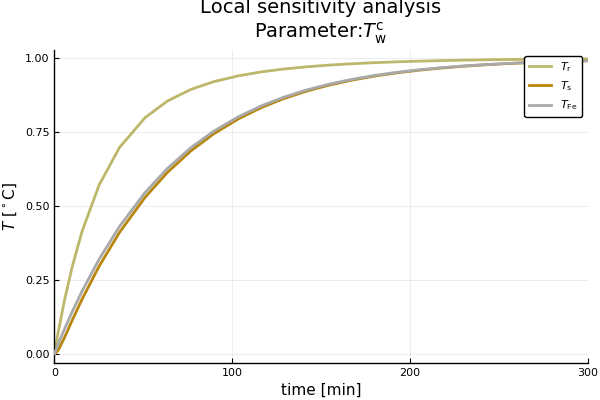

In [85]:
# Due to Twc
dTwc=dTwc'
dTwcTr, dTwcTs, dTwcTFe=dTwc[:,1],dTwc[:,2],dTwc[:,3]
plot(sol.t/60,dTwcTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dTwcTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dTwcTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotTwc=plot!(title=string("Local sensitivity analysis\nParameter:", "\$T_\\mathrm{w}^\\mathrm{c}\$") ,legend=:topright)

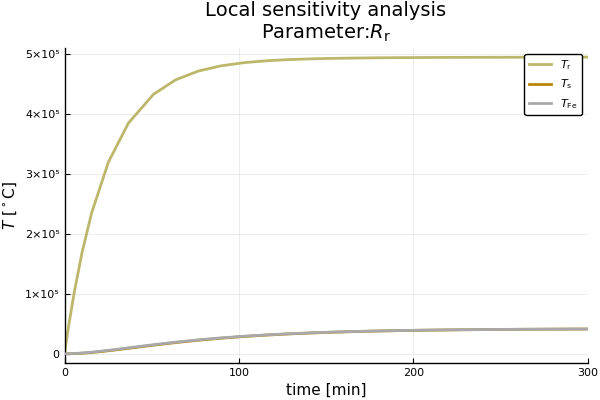

In [86]:
# Due to Rr
dRr=dRr'
dRrTr, dRrTs, dRrTFe=dRr[:,1],dRr[:,2],dRr[:,3]
plot(sol.t/60,dRrTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dRrTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dRrTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotRr=plot!(title=string("Local sensitivity analysis\nParameter:", "\$R_\\mathrm{r}\$") ,legend=:topright)

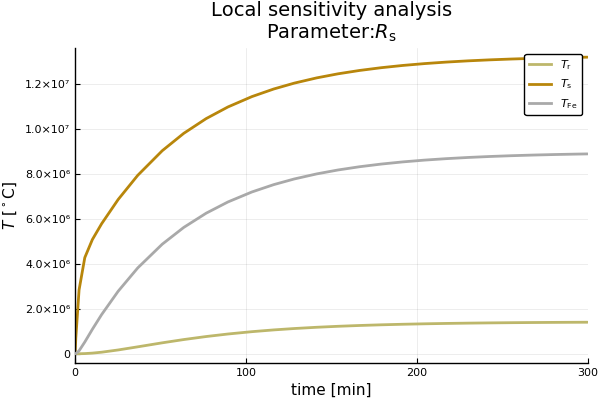

In [87]:
# Due to Rs
dRs=dRs'
dRsTr, dRsTs, dRsTFe=dRs[:,1],dRs[:,2],dRs[:,3]
plot(sol.t/60,dRsTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dRsTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dRsTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotRs=plot!(title=string("Local sensitivity analysis\nParameter:", "\$R_\\mathrm{s}\$") ,legend=:topright)


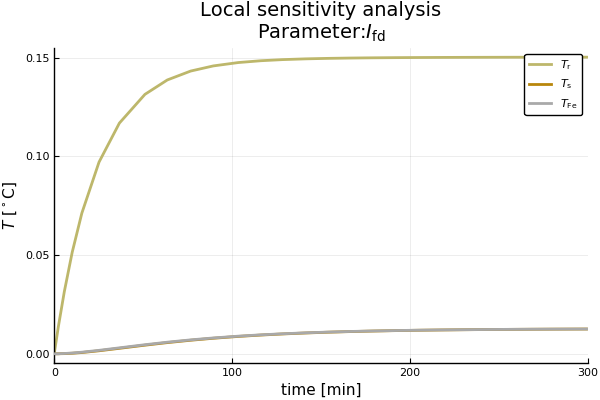

In [88]:
# Due to Ifd
dIfd=dIfd'
dIfdTr, dIfdTs, dIfdTFe=dIfd[:,1],dIfd[:,2],dIfd[:,3]
plot(sol.t/60,dIfdTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dIfdTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dIfdTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotIfd=plot!(title=string("Local sensitivity analysis\nParameter:", "\$I_\\mathrm{fd}\$") ,legend=:topright)


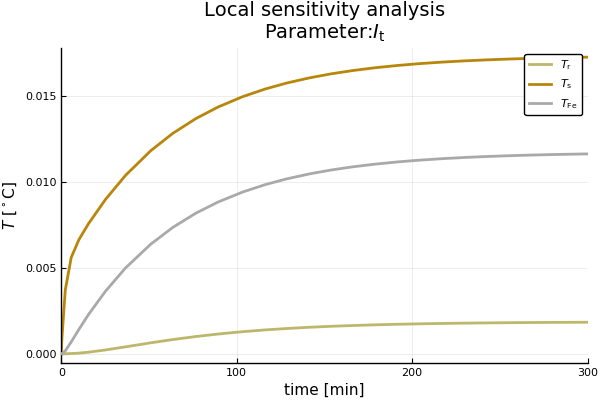

In [89]:
# Due to It
dIt=dIt'
dItTr, dItTs, dItTFe=dIt[:,1],dIt[:,2],dIt[:,3]
plot(sol.t/60,dItTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dItTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dItTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotIt=plot!(title=string("Local sensitivity analysis\nParameter:", "\$I_\\mathrm{t}\$") ,legend=:topright)


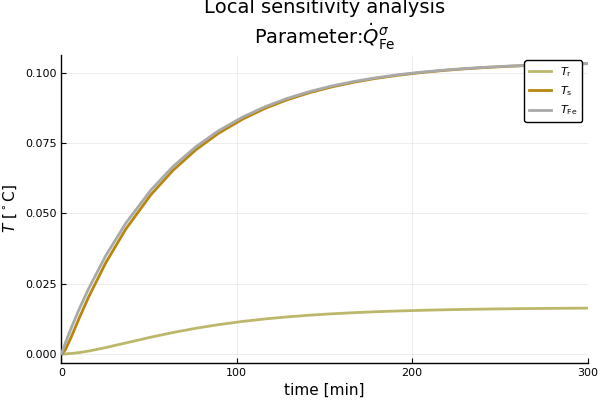

In [90]:
# Due to QdFes
dQdFes=dQdFes'
dQdFesTr, dQdFesTs, dQdFesTFe=dQdFes[:,1],dQdFes[:,2],dQdFes[:,3]
plot(sol.t/60,dQdFesTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dQdFesTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dQdFesTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotQdFes=plot!(title=string("Local sensitivity analysis\nParameter:", "\$\\dotQ_\\mathrm{Fe}^\\sigma\$") ,legend=:topright)

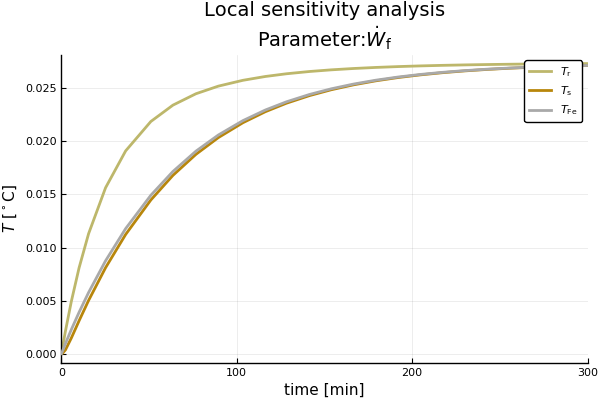

In [91]:
# Due to Wdf
dWdf=dWdf'
dWdfTr, dWdfTs, dWdfTFe=dWdf[:,1],dWdf[:,2],dWdf[:,3]
plot(sol.t/60,dWdfTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dWdfTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dWdfTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotWdf=plot!(title=string("Local sensitivity analysis\nParameter:", "\$\\dotW_\\mathrm{f}\$") ,legend=:topright)

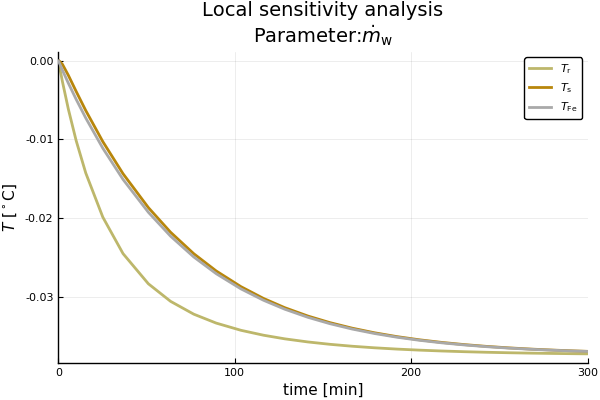

In [92]:
# Due to mdw
dmdw=dmdw'
dmdwTr, dmdwTs, dmdwTFe=dmdw[:,1],dmdw[:,2],dmdw[:,3]
plot(sol.t/60,dmdwTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dmdwTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dmdwTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotmdw=plot!(title=string("Local sensitivity analysis\nParameter:", "\$\\dotm_\\mathrm{w}\$") ,legend=:topright)

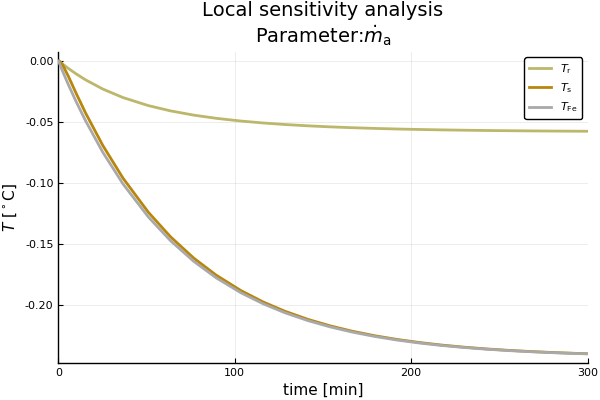

In [93]:
# Due to mda
dmda=dmda'
dmdaTr, dmdaTs, dmdaTFe=dmda[:,1],dmda[:,2],dmda[:,3]
plot(sol.t/60,dmdaTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dmdaTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dmdaTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotmda=plot!(title=string("Local sensitivity analysis\nParameter:", "\$\\dotm_\\mathrm{a}\$") ,legend=:topright)

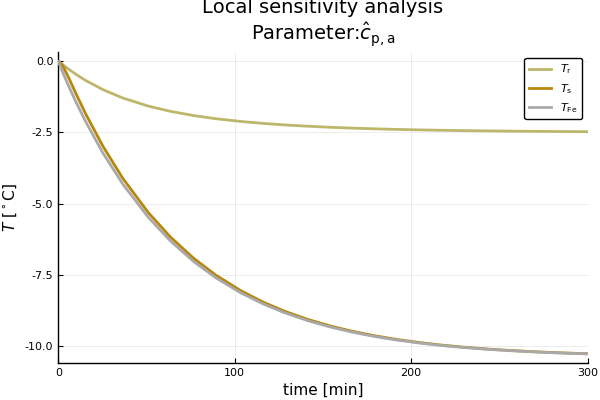

In [94]:
# Due to chpa
dchpa=dchpa'
dchpaTr, dchpaTs, dchpaTFe=dchpa[:,1],dchpa[:,2],dchpa[:,3]
plot(sol.t/60,dchpaTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dchpaTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dchpaTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotchpa=plot!(title=string("Local sensitivity analysis\nParameter:", "\$\\hatc_\\mathrm{p,a}\$") ,legend=:topright)

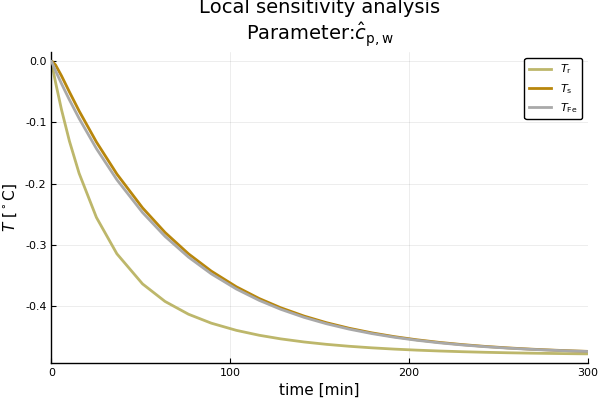

In [95]:
# Due to chpw
dchpw=dchpw'
dchpwTr, dchpwTs, dchpwTFe=dchpw[:,1],dchpw[:,2],dchpw[:,3]
plot(sol.t/60,dchpwTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dchpwTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dchpwTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotchpw=plot!(title=string("Local sensitivity analysis\nParameter:", "\$\\hatc_\\mathrm{p,w}\$") ,legend=:topright)

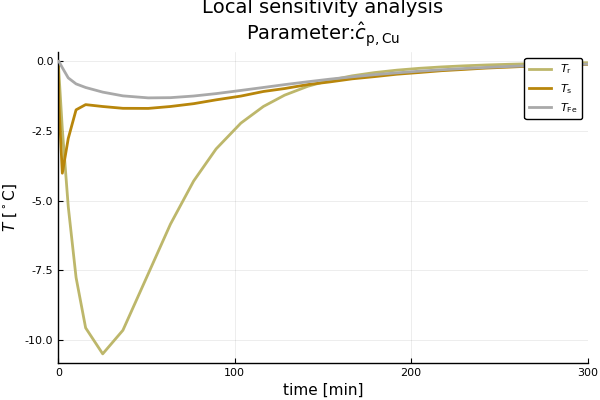

In [96]:
# Due to chpCu
dchpCu=dchpCu'
dchpCuTr, dchpCuTs, dchpCuTFe=dchpCu[:,1],dchpCu[:,2],dchpCu[:,3]
plot(sol.t/60,dchpCuTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dchpCuTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dchpCuTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotchpCu=plot!(title=string("Local sensitivity analysis\nParameter:", "\$\\hatc_\\mathrm{p,Cu}\$") ,legend=:topright)

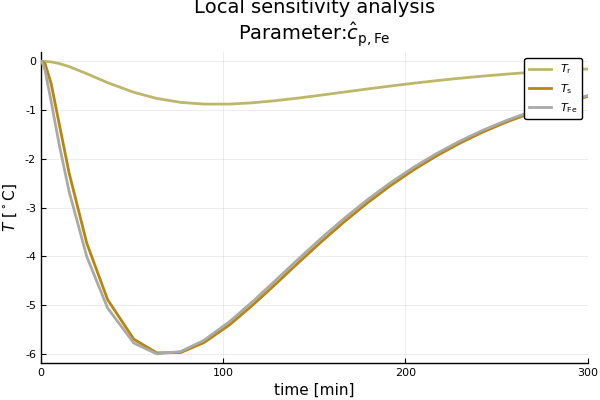

In [97]:
# Due to chpFe
dchpFe=dchpFe'
dchpFeTr, dchpFeTs, dchpFeTFe=dchpFe[:,1],dchpFe[:,2],dchpFe[:,3]
plot(sol.t/60,dchpFeTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dchpFeTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dchpFeTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotchpFe=plot!(title=string("Local sensitivity analysis\nParameter:", "\$\\hatc_\\mathrm{p,Fe}\$") ,legend=:topright)

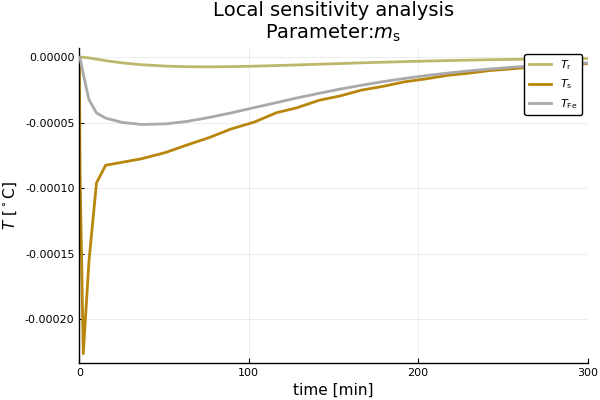

In [98]:
# Due to ms
dms=dms'
dmsTr, dmsTs, dmsTFe=dms[:,1],dms[:,2],dms[:,3]
plot(sol.t/60,dmsTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dmsTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dmsTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotms=plot!(title=string("Local sensitivity analysis\nParameter:", "\$m_\\mathrm{s}\$") ,legend=:topright)

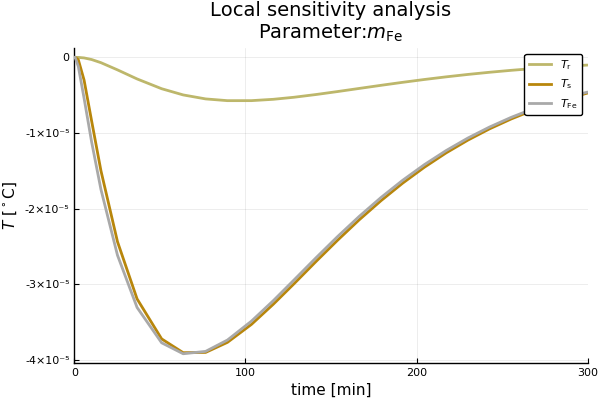

In [99]:
# Due to mFe
dmFe=dmFe'
dmFeTr, dmFeTs, dmFeTFe=dmFe[:,1],dmFe[:,2],dmFe[:,3]
plot(sol.t/60,dmFeTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dmFeTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dmFeTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotmFe=plot!(title=string("Local sensitivity analysis\nParameter:", "\$m_\\mathrm{Fe}\$") ,legend=:topright)

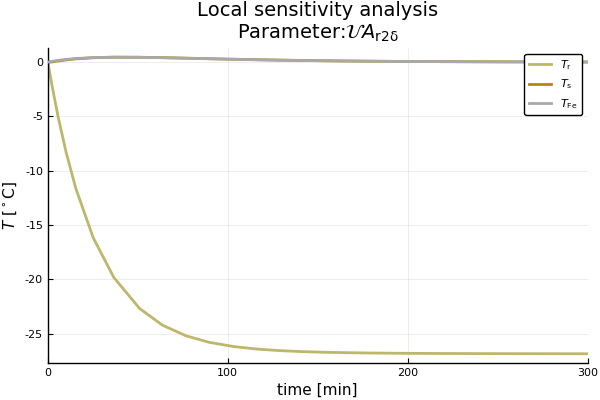

In [100]:
# Due to UAr2d
dUAr2d=dUAr2d'
dUAr2dTr, dUAr2dTs, dUAr2dTFe=dUAr2d[:,1],dUAr2d[:,2],dUAr2d[:,3]
plot(sol.t/60,dUAr2dTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dUAr2dTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dUAr2dTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotUAr2d=plot!(title=string("Local sensitivity analysis\nParameter:", "\$\\mathcal{U}A_\\mathrm{r2\\delta}\$") ,legend=:topright)

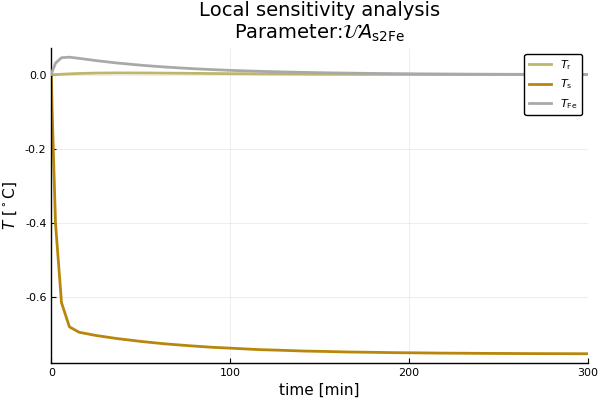

In [101]:
# Due to UAs2Fe
dUAs2Fe=dUAs2Fe'
dUAs2FeTr, dUAs2FeTs, dUAs2FeTFe=dUAs2Fe[:,1],dUAs2Fe[:,2],dUAs2Fe[:,3]
plot(sol.t/60,dUAs2FeTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dUAs2FeTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dUAs2FeTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotUAs2Fe=plot!(title=string("Local sensitivity analysis\nParameter:", "\$\\mathcal{U}A_\\mathrm{s2Fe}\$") ,legend=:topright)

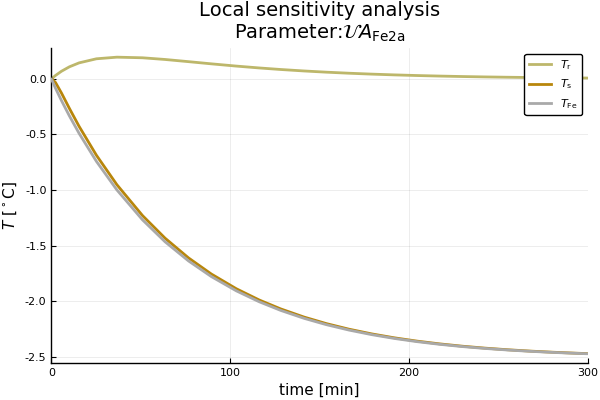

In [102]:
# Due to UAFe2a
dUAFe2a=dUAFe2a'
dUAFe2aTr, dUAFe2aTs, dUAFe2aTFe=dUAFe2a[:,1],dUAFe2a[:,2],dUAFe2a[:,3]
plot(sol.t/60,dUAFe2aTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dUAFe2aTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dUAFe2aTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotUAFe2a=plot!(title=string("Local sensitivity analysis\nParameter:", "\$\\mathcal{U}A_\\mathrm{Fe2a}\$") ,legend=:topright)

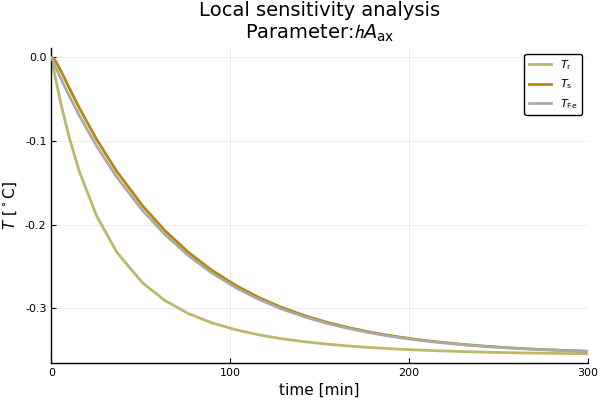

In [103]:
# Due to hAax
dhAax=dhAax'
dhAaxTr, dhAaxTs, dhAaxTFe=dhAax[:,1],dhAax[:,2],dhAax[:,3]
plot(sol.t/60,dhAaxTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dhAaxTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dhAaxTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plothAax=plot!(title=string("Local sensitivity analysis\nParameter:", "\$\\mathcal{h}A_\\mathrm{ax}\$") ,legend=:topright)

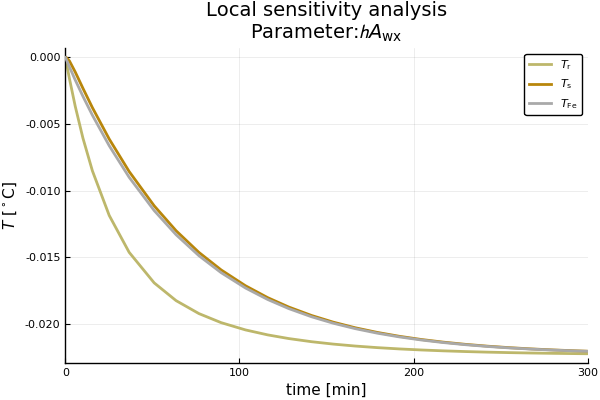

In [106]:
# Due to hAwx
dhAwx=dhAwx'
dhAwxTr, dhAwxTs, dhAwxTFe=dhAwx[:,1],dhAwx[:,2],dhAwx[:,3]
plot(sol.t/60,dhAwxTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dhAwxTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dhAwxTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plothAwx=plot!(title=string("Local sensitivity analysis\nParameter:", "\$\\mathcal{h}A_\\mathrm{wx}\$") ,legend=:topright)

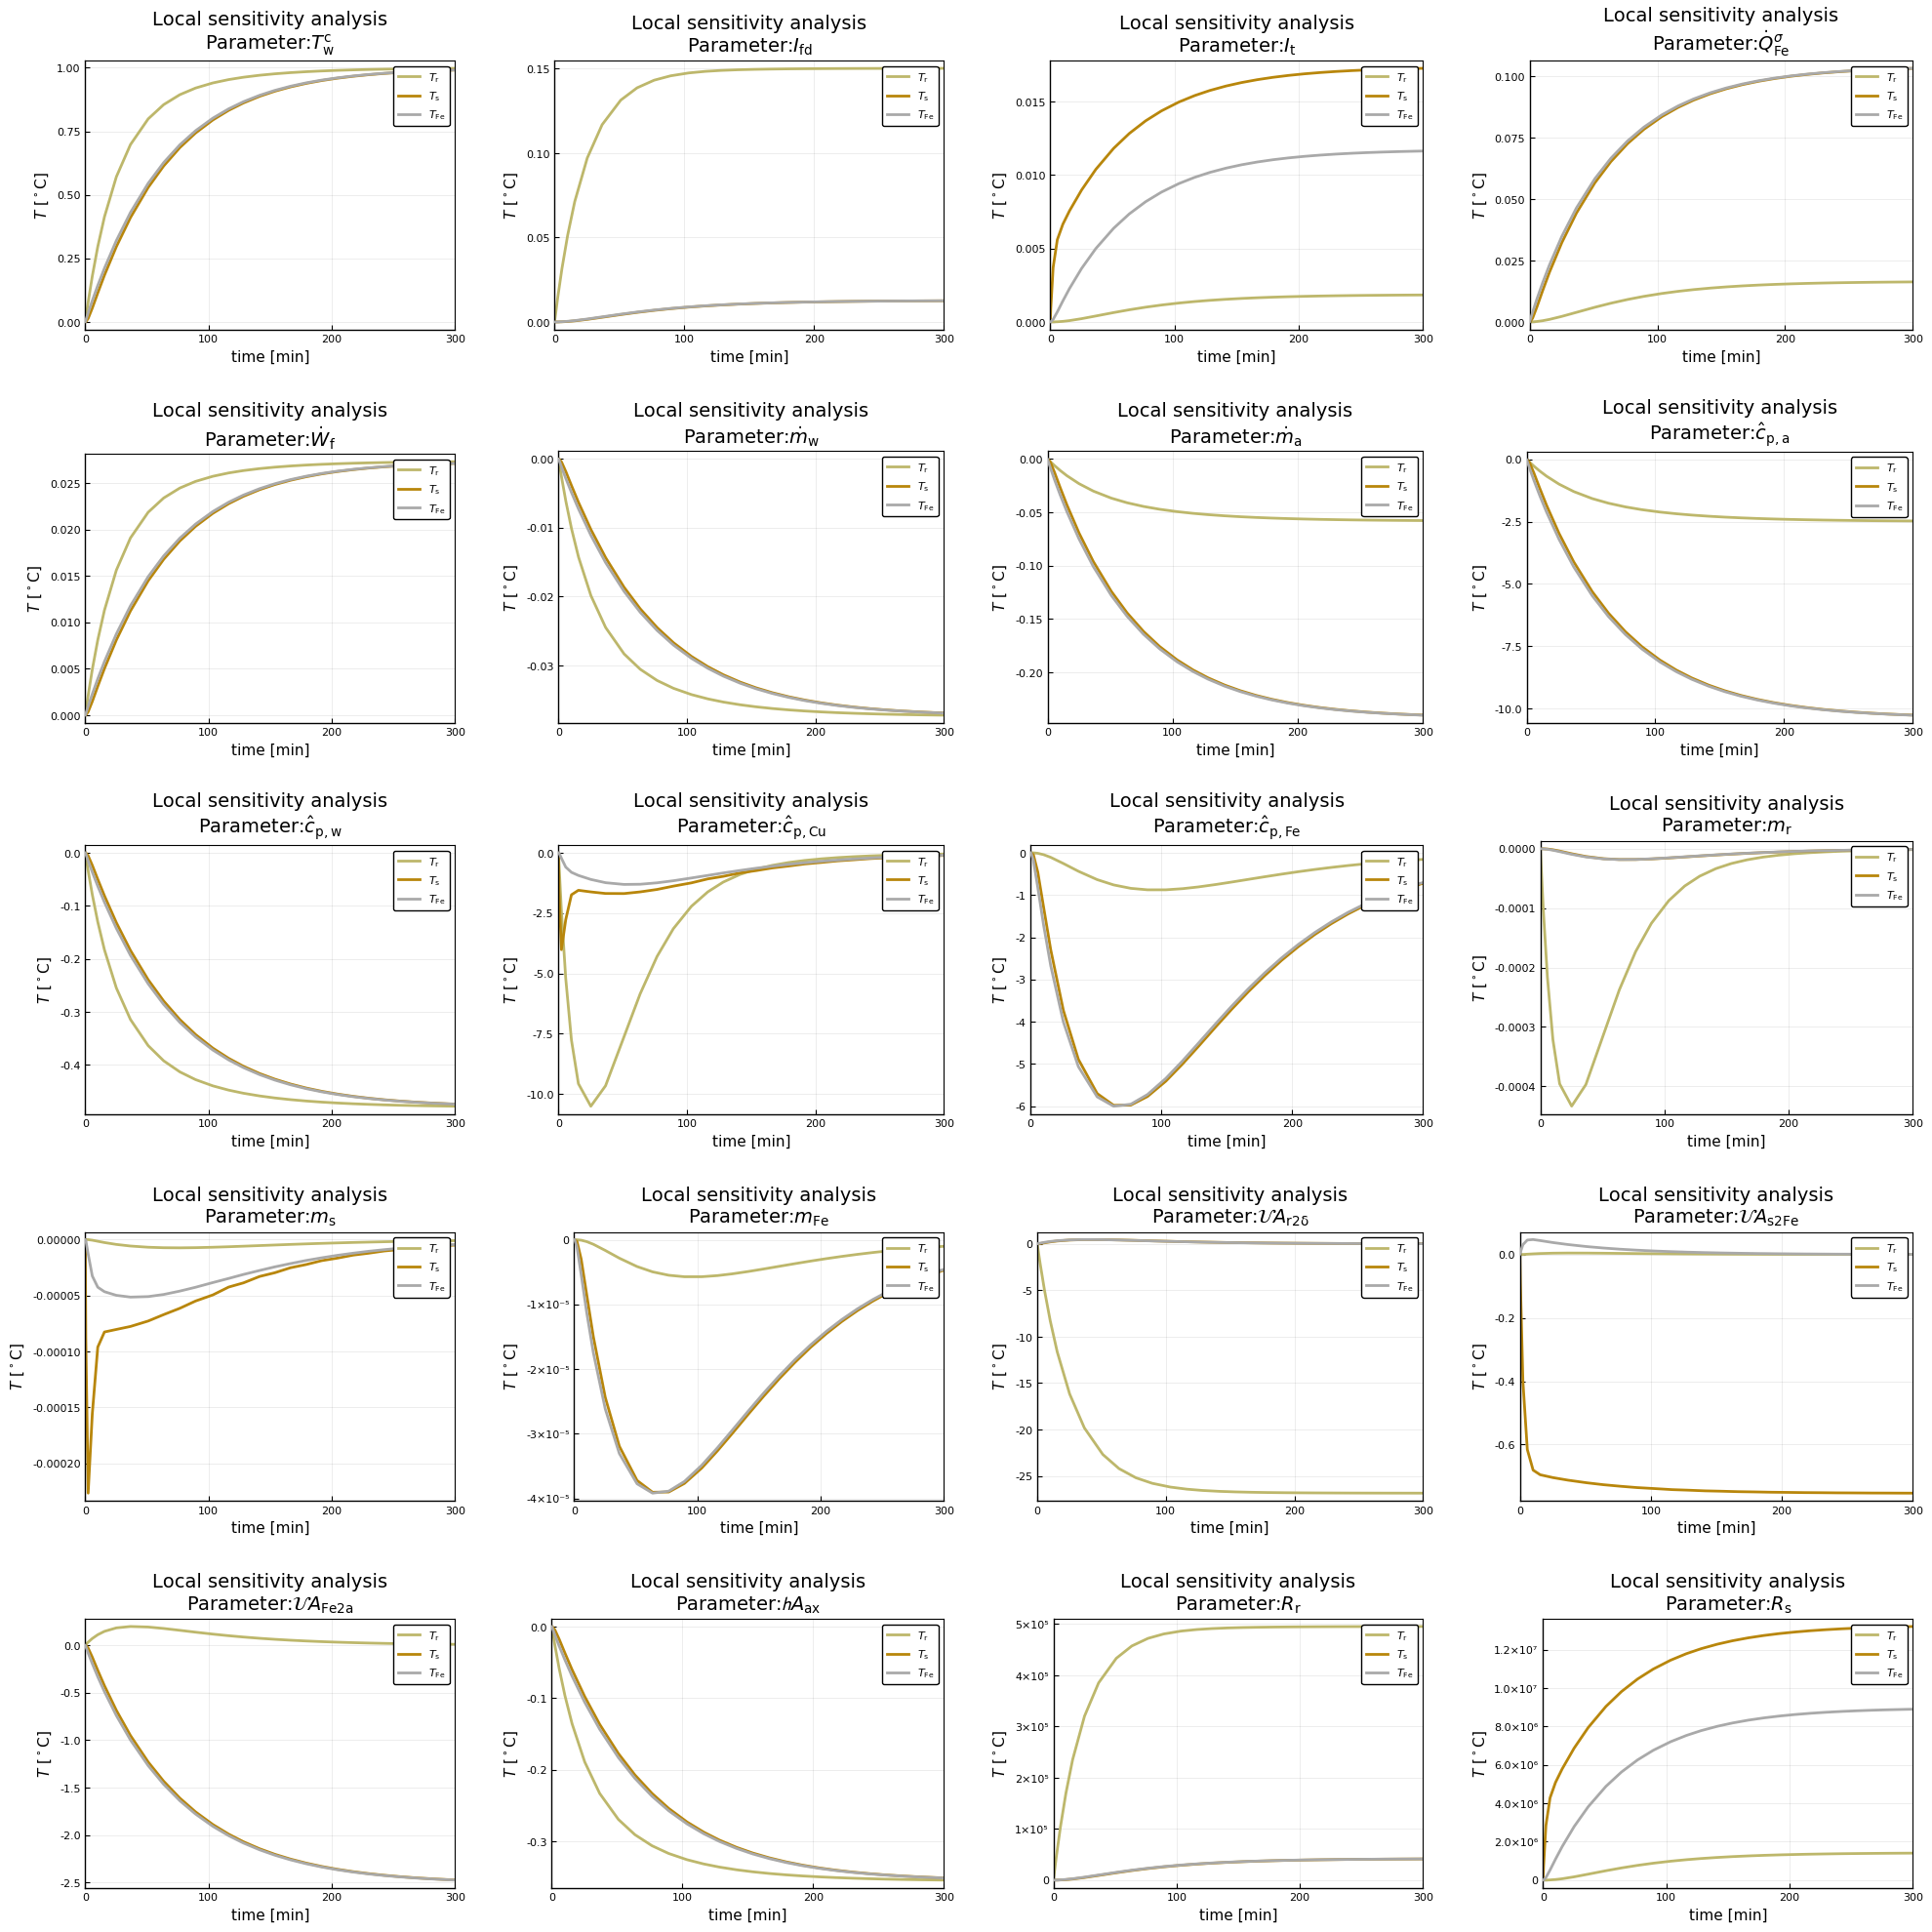

In [107]:
plot(plotTwc,plotIfd,plotIt,plotQdFes,plotWdf,plotmdw,plotmda,plotchpa,plotchpw,plotchpCu,plotchpFe,plotmr,plotms,plotmFe,plotUAr2d,plotUAs2Fe,plotUAFe2a,plothAax,plotRr,plotRs,
        layout=grid(5,4),size = (2000, 2000),framestyle = :box,
        bottom_margin=10mm,right_margin=10mm)# Due to It
figfile="LocalSensitivity.svg"
savefig(figpath*figfile)

In [6]:
# Global sensitivity using Morrins screening method
# Parameters
p = [3.8,1055.,5360.,212.,528.,53.9,49.2,1.15,4.2,0.385,0.465,9260.,6827.,71200.,2.7,20.,14.3,55.6,222.,0.16e-3,3.5e-6]
# Initial values
x0 = [94., 81., 70.]
# Time span
tspan = (0., 300*60.)
# Solving problem
probMorris = ODEProblem(gen,x0,tspan,p)
t = collect(range(0, stop=5, length=20))
param_boundary = [
[0.9*3.8,1.1*3.8],[0.9*1055.,1.1*1055.],[0.9*5360.,1.1*5360.],[0.9*212.,1.1*212.],[0.9*528.,1.1*528.],[0.9*53.9,1.1*53.9],[0.9*49.2,1.1*49.2],[0.9*1.15,1.1*1.15],[0.9*4.2,1.1*4.2],[0.9*0.385,1.1*0.385],[0.9*0.465,1.1*0.465],[0.9*9260.,1.1*9260.],[0.9*6827.,1.1*6827.],[0.9*71200.,1.1*71200],[0.9*2.7,1.1*2.7],[0.9*20.,1.1*20],[0.9*14.3,1.1*14.3],[0.9*55.6,1.1*56.6],[0.9*222.,1.1*222.],[0.9*0.16e-3,1.1*0.16e-3],[0.9*3.5e-6,1.1*3.5e-6]
]
param_steps=[10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10]

21-element Array{Int64,1}:
 10
 10
 10
 10
 10
 10
 10
 10
 10
 10
 10
 10
 10
 10
 10
 10
 10
 10
 10
 10
 10

In [7]:
mean_variance = DiffEqSensitivity.morris_sensitivity(probMorris,Tsit5(),t,param_boundary,param_steps
    ,len_trajectory=150,total_num_trajectory=5*100,num_trajectory=100)

MorrisSensitivity(Array{Float64,2}[[0.0 0.000154917 … 0.00278443 0.00293886; 0.0 7.11073e-8 … 2.27454e-5 2.53239e-5; 0.0 7.04407e-5 … 0.00126555 0.00133571], [0.0 2.72055e-5 … 0.000488936 0.000516052; 0.0 5.89492e-14 … 3.40222e-10 3.99909e-10; 0.0 8.80192e-11 … 2.84503e-8 3.16948e-8], [0.0 8.46822e-15 … 4.88745e-11 5.74459e-11; 0.0 1.11127e-5 … 0.000196637 0.000207353; 0.0 8.9032e-10 … 2.84784e-7 3.17067e-7], [0.0 1.13633e-10 … 3.6729e-8 4.09176e-8; 0.0 7.98256e-9 … 2.55336e-6 2.84281e-6; 0.0 7.95424e-6 … 0.000142888 0.000150809], [0.0 4.24466e-6 … 7.62922e-5 8.05237e-5; 0.0 1.95599e-9 … 6.25678e-7 6.96605e-7; 0.0 1.94072e-6 … 3.48667e-5 3.67997e-5], [0.0 5.32461e-6 … 9.57057e-5 0.000101014; 0.0 2.46477e-9 … 7.88503e-7 8.77894e-7; 0.0 2.4656e-6 … 4.42973e-5 4.67531e-5], [0.0 5.78688e-6 … 0.000104103 0.000109883; 0.0 1.75812e-8 … 5.62324e-6 6.26066e-6; 0.0 1.73671e-5 … 0.000311988 0.000329283], [0.0 0.000245504 … 0.00441662 0.00466184; 0.0 7.55097e-7 … 0.000241498 0.000268872; 0.0 0.000

In [47]:
# Etracting mean and variances
mean_values=mean_variance.means
variance_values=mean_variance.variances
mean_values=mean_values'
effects_values

# Mean values of all parameters
gMTwc,gMIfd,gMIt,gMQdFes,gMWdf,gMmdw,gMmda,gMchpa,gMchpw,gMchpCu,
gMchpFe,gMmr,gMms,gMmFe,gMUAr2d,gMUAs2Fe,gMUAFe2a,gMhAax,gMhAwx,gMRr,gMRs=mean_values;

# Variance values of all parameters
gVTwc,gVIfd,gVIt,gVQdFes,gVWdf,gVmdw,gVmda,gVchpa,gVchpw,gVchpCu,
gVchpFe,gVmr,gVms,gVmFe,gVUAr2d,gVUAs2Fe,gVUAFe2a,gVhAax,gVhAwx,gVRr,gVRs=variance_values;



In [65]:
effects_values=mean_variance.effects

ErrorException: type MorrisSensitivity has no field effects

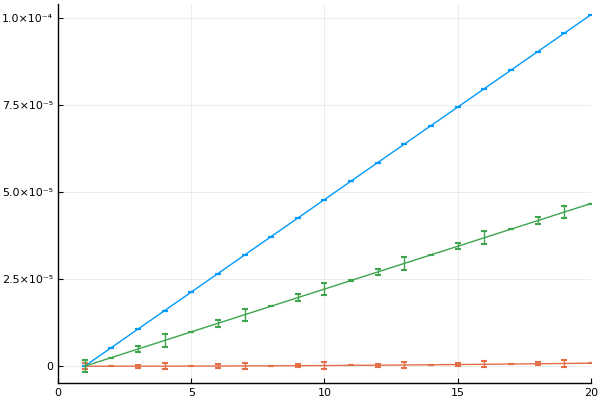

In [73]:
stdv1 = sqrt.(mean_variance.variances[6])
p = plot(mean_variance.means[6]', yerror=stdv1,legend=false,xlim=(0,20))

In [48]:
gSTwcTr,gSTwcTs,gSTwcTFe=sqrt.(gVTwc[1,:]),sqrt.(gVTwc[2,:]),sqrt.(gVTwc[3,:])
gMTwcTr,gMTwcTs,gMTwcTFe=gMTwc[:,1],gMTwc[:,2],gMTwc[:,3]



([0.0, 0.000154917, 0.000309808, 0.000464671, 0.000619508, 0.000774319, 0.000929102, 0.00108386, 0.00123859, 0.00139329, 0.00154797, 0.00170262, 0.00185724, 0.00201184, 0.00216641, 0.00232095, 0.00247547, 0.00262996, 0.00278443, 0.00293886], [0.0, 7.11073e-8, 2.84214e-7, 6.38999e-7, 1.13514e-6, 1.77232e-6, 2.55021e-6, 3.4685e-6, 4.52687e-6, 5.72501e-6, 7.06259e-6, 8.53929e-6, 1.01548e-5, 1.19088e-5, 1.3801e-5, 1.58311e-5, 1.79987e-5, 2.03036e-5, 2.27454e-5, 2.53239e-5], [0.0, 7.04407e-5, 0.000140866, 0.000211275, 0.000281668, 0.000352046, 0.000422409, 0.000492755, 0.000563086, 0.000633402, 0.000703702, 0.000773987, 0.000844256, 0.000914509, 0.000984748, 0.00105497, 0.00112518, 0.00119537, 0.00126555, 0.00133571])

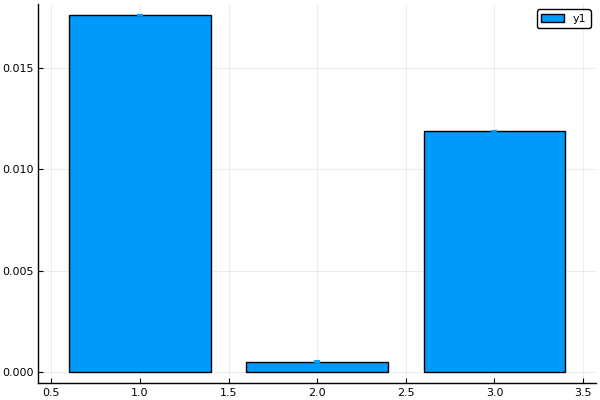

In [106]:
# Calcultaing standard deviations
gSTwcTr,gSTwcTs,gSTwcTFe=sqrt.(gVTwc[1,:]),sqrt.(gVTwc[2,:]),sqrt.(gVTwc[3,:])
gMTwcTr,gMTwcTs,gMTwcTFe=sqrt.(gMTwc[1,:]),sqrt.(gMTwc[2,:]),sqrt.(gMTwc[3,:])
# Plot mean vs sigma space
bar(gMTwcTr,yerror=gSTwcTr)
bar(gMTwcTs,yerror=gSTwcTs)
bar(gMTwcTFe,yerror=gSTwcTFe)

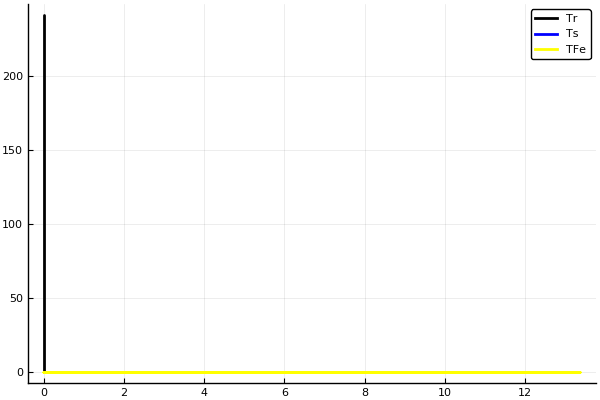

In [140]:
## Calcultaing standard deviations
gSRrTr,gSRrTs,gSRrTFe=sqrt.(gVRr[1,:]),sqrt.(gVRr[2,:]),sqrt.(gVRr[3,:])
gMRrTr,gMRrTs,gMRrTFe=sqrt.(gMRr[1,:]),sqrt.(gMRr[2,:]),sqrt.(gMRr[3,:])
# Plot mean vs sigma space
plot(gMRrTr,gSRrTr,label="Tr",lw=2,lc=:black)
plot!(gMRrTs,gSRrTs,label="Ts",lw=2,lc=:blue)
plot!(gMRrTFe,gSRrTFe,label="TFe",lw=2,lc=:yellow)

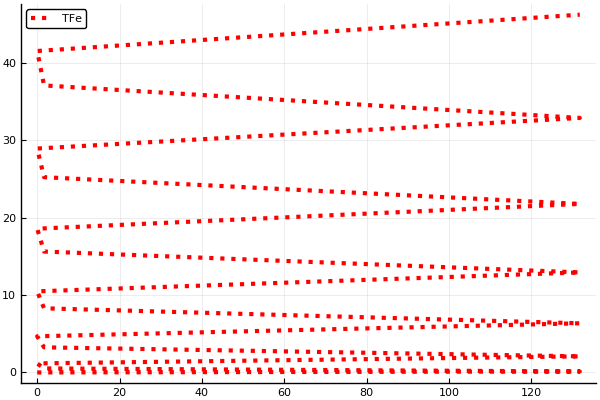

In [146]:
## Calcultaing standard deviations
gSRsTr,gSRsTs,gSRsTFe=sqrt.(gVRs[1,:]),sqrt.(gVRs[2,:]),sqrt.(gVRs[3,:])
gMRsTr,gMRsTs,gMRsTFe=sqrt.(gMRs[1,:]),sqrt.(gMRs[2,:]),sqrt.(gMRs[3,:])
# Plot mean vs sigma space
#plot(gMRsTr,gSRsTr,label="Tr",lc=:black)
#plot!(gMRsTs,gSRsTs,label="Ts",lc=:blue)
plot(gMRsTFe,gSRsTFe,label="TFe",ls=:dot,lw=3,lc=:red)